# Project description


Ask a buyer to describe their dream home and they probably won't start with basement ceiling height or proximity to an east-west rail line. But the data set from this playground contest proves that price negotiations are influenced by much more than the number of bedrooms or a white picket fence.

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

This dataset contains 79 explanatory variables describing almost every aspect of residential homes in Ames, Iowa. 

**Goal:** It is your job to predict the sales price for each house using everything you have learned so far. If **you use a model not presented in class, you must justify it, explain how it works and describe precisely the role of each of the hyper-parameters**. For each Id in the test set, you must predict the value of the SalePrice variable. 

**Metric:** Predictions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

**Homework submission**: You must upload a zip archive containing 3 files to``lms.univ-cotedazur.fr`:

* A `pdf` report describing for each of the selected features the treatment performed
* A `jupyter notebook` performing the preprocessing, each step of which is inserted into a sklearn or imblearn pipeline (you must leave traces of notebook executions. The first cell should have the number 1, the second the number 2, etc.)
* A `result.csv` should contain your prediction for each of the properties in tthe test set in the the following format:
<pre>
        Id,SalePrice
        1461,169000.9876
        1462,187724.1233
        1463,175221.1928
        etc.
</pre>

The scale will be as follows:
* 8 points on the quality of the preprocessing and its description from the report 
* 8 points on the quality and correctness of the code contained in the notebook
* 4 points on the quality of the model produced

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

more detail about the features on `data_description.txt`files

In [1]:
#Librairies
#Not everything is used in the project but some are imported because I run some test with differents methods while processing the data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
np.seterr(divide = 'ignore')
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor



In [2]:

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression,LinearRegression

In [3]:
# Read train files

df_train = pd.read_csv("train.csv", index_col=0)
print(len(df_train))
df_train.head()

1000


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [4]:
# Read test file
df_test = pd.read_csv("test.csv", index_col=0)
print(len(df_test))
df_test.head(3)

460


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
id                                                                      
1000          20       RL         74.0    10206   Pave   NaN      Reg   
1001          30       RL         60.0     5400   Pave   NaN      Reg   
1002          20       RL         75.0    11957   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
id                                    ...                                     
1000         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
1001         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
1002         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
id                                                                 
1000         NaN       0       7    2009        WD         Normal  
1001         NaN       0       1    2007        WD        Abnorml  
1002         NaN       0       7    2008        WD         Normal  

[3 rows x 79 columns]

In [5]:
#Analyzing datasets in order to familiarize with it

print("Test shape :",df_test.shape) # 1 less column than train because no SalePrice yet
print("Train shape :",df_train.shape)

Test shape : (460, 79)
Train shape : (1000, 80)


In [6]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [7]:
df_test.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [8]:
trainFeatureWithNullvalues=DataFrame(df_train.isnull().sum().sort_values(ascending=True)[-10:])

In [9]:
print("Features with the most null values for training set :\n",trainFeatureWithNullvalues,"\n")

Features with the most null values for training set :
                 0
GarageCond     56
GarageQual     56
GarageFinish   56
GarageType     56
LotFrontage   173
FireplaceQu   478
Fence         806
Alley         935
MiscFeature   957
PoolQC        998 



In [10]:
#Cleaning of the datasets
#As these features have a lot of null values (more than 50% and up to 99%),
#I will drop those columns to have some cleaner training and testing datasets

TrainlistToDrop=list(trainFeatureWithNullvalues[0].index[-5:])#Selecting the features with the most null values

print("Features deleted :",TrainlistToDrop)

df_test.drop(TrainlistToDrop,axis=1,inplace=True)
df_train.drop(TrainlistToDrop,axis=1,inplace=True)

#references : https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

Features deleted : ['FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC']


In [11]:
#For the rest of the numerical features, we will replace the null value by the mean of the feature
train_numerical_features=df_train.select_dtypes(include=[np.number])
test_numerical_features=df_test.select_dtypes(include=[np.number])

for col in train_numerical_features:
    df_train[col].fillna(int(df_train[col].mean()), inplace=True)

for col in test_numerical_features:
    df_test[col].fillna(int(df_test[col].mean()), inplace=True)

In [12]:
#We now have different shapes from before
print("Test shape :",df_test.shape)
print("Train shape :",df_train.shape)

Test shape : (460, 74)
Train shape : (1000, 75)


In [13]:
#Now let's check the feature with a high percentage of similar value / outliers in every rows 
#Check Z score approach here !!
sameValueColumns = []
number=0
for features in df_train.columns:
    value_counter = df_train[features].value_counts() #Display number of occurences for each value in each columns
    similarities = (value_counter/len(df_train.index)).iloc[0] 
    
    if similarities > 0.90:
        sameValueColumns.append(features)
sameValueColumns #List of features with more than 90% of similar values for string features and outlier for numerical features

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [14]:
#I consider that this set of columns is non relevant as it has too many similar values so I will drop it from the datasets
df_test.drop(sameValueColumns,axis=1,inplace=True)
df_train.drop(sameValueColumns,axis=1,inplace=True)

In [15]:
#The number of features has now dicreased again
print("Test number of columns :",df_test.shape[1])
print("Train numbers of columns :",df_train.shape[1])

Test number of columns : 55
Train numbers of columns : 56


In [16]:
#Now let's check the correlation between features and the SalePrice feature in order to see what features has no impact on the SalePrice
#corr() function only apply to features with numerical values
correlation = df_train.corr()['SalePrice']
correlation = correlation.sort_values()
correlation

#references :
#https://www.journaldunet.fr/web-tech/developpement/1441113-comment-utiliser-corr-pour-obtenir-une-correlation-entre-deux-colonnes-avec-pandas/
#https://www.youtube.com/watch?v=qWHBOOfku7k&ab_channel=ThePythonChannel

C:\Users\paul\AppData\Local\Temp\ipykernel_38352\3430576361.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_train.corr()['SalePrice']


EnclosedPorch   -0.111712
OverallCond     -0.095816
MSSubClass      -0.081252
YrSold          -0.030562
BsmtFinSF2       0.000359
MoSold           0.039314
BedroomAbvGr     0.173287
BsmtFullBath     0.216566
BsmtUnfSF        0.221219
LotArea          0.265493
HalfBath         0.304008
OpenPorchSF      0.319551
WoodDeckSF       0.324953
2ndFlrSF         0.325329
LotFrontage      0.357521
BsmtFinSF1       0.389868
Fireplaces       0.473011
GarageYrBlt      0.478479
MasVnrArea       0.492796
YearRemodAdd     0.526195
YearBuilt        0.527193
FullBath         0.559980
TotRmsAbvGrd     0.570375
1stFlrSF         0.627749
TotalBsmtSF      0.642127
GarageArea       0.647953
GarageCars       0.658204
GrLivArea        0.734997
OverallQual      0.797666
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [17]:
#create a dataframe of the correlations ot have a better visualization of the non needed features
correlation=correlation.to_frame()
correlation=correlation.reset_index()
correlation= correlation.rename(columns={'index':'Features','SalePrice':'Correlation_Price'})


In [18]:
correlation.head(5)

Features  Correlation_Price
0  EnclosedPorch          -0.111712
1    OverallCond          -0.095816
2     MSSubClass          -0.081252
3         YrSold          -0.030562
4     BsmtFinSF2           0.000359

In [19]:
#We can see that we have some value around 0, it means that these features has litle correlation with the change of SalePrice
#I will get rid of features having between -0,2 and +0,2 correlations with SalePrice
#correlation['index'][-0.2<correlation['SalePrice']<0.2]

badCorrelation=(correlation['Features'][(correlation['Correlation_Price'] > -0.2) & (correlation['Correlation_Price'] < 0.2)]).tolist()
badCorrelation

['EnclosedPorch',
 'OverallCond',
 'MSSubClass',
 'YrSold',
 'BsmtFinSF2',
 'MoSold',
 'BedroomAbvGr']

In [20]:
#Droping the badCorrelation list of features
df_test.drop(badCorrelation,axis=1,inplace=True)
df_train.drop(badCorrelation,axis=1,inplace=True)

In [21]:
#The number of feature has now dicreased again
print("Test number of columns :",df_test.shape[1])
print("Train numbers of columns :",df_train.shape[1])

Test number of columns : 48
Train numbers of columns : 49


In [22]:
#Now let's check that the unique value of non-numerical features are the same in the Train and Test datasets
a=0
nonSameUnique=[] #Will be the features with some different values in Test and train set
problemOfNullValue=[] #Features we will have to deal with because of null value
for features in (df_test.select_dtypes(exclude = [np.number])).columns:
    try:
        if(sorted(df_test[features].unique())!=sorted(df_train[features].unique())):
            nonSameUnique.append(features)
    except:
        problemOfNullValue.append(features)
        
print(nonSameUnique)
print(problemOfNullValue)

['Neighborhood', 'Condition1', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'HeatingQC', 'SaleType', 'SaleCondition']
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish']


In [23]:
excess_value=[]#list of excess value that are in the training set and not in the testing set

for uniques in nonSameUnique:
    current_feature=[] #Sub list of the current feature
    current_feature.append(uniques)
    for i in range(len(df_train[uniques].unique())):
        if ((df_train[uniques].unique())[i] not in df_test[uniques].unique()): #Looking for feature that are in train and not in test
            current_feature.append(df_train[uniques].unique()[i])
    if len(current_feature)>1: #To avoid features that are in test but not in train, we dont have to eliminate these
        excess_value.append(current_feature) #Append [Feature,1st_missingValue,...,N_missingValue]
    
print(excess_value)
print(len(excess_value))

[['Neighborhood', 'Blueste'], ['Condition1', 'RRNe'], ['Exterior2nd', 'Other'], ['ExterCond', 'Po'], ['HeatingQC', 'Po'], ['SaleType', 'ConLI', 'Con'], ['SaleCondition', 'AdjLand']]
7


In [24]:
#We will now replace these all of the occurence of these excess unique value by the value the most represented in this feature.
for feature in range(len(excess_value)):
    for i in range(0,len(excess_value[feature])-1):
        df_train[excess_value[feature][0]]=df_train[excess_value[feature][0]].replace([excess_value[feature][i+1]],df_train[excess_value[feature][0]].mode())


#ressources = https://www.youtube.com/watch?v=QA_XVkjIaiw&ab_channel=cbsecsip

In [25]:
#Exctracting numerical features in order to put it in a log scale
train_numerical_feature=df_train.select_dtypes(include=[np.number])
test_numerical_feature=df_test.select_dtypes(include=[np.number])

train_numerical_feature.head(2)

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0         65.0     8450            7       2003          2003       196.0   
1         80.0     9600            6       1976          1976         0.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  FullBath  HalfBath  \
0         706        150          856       856  ...         2         1   
1         978        284         1262      1262  ...         2         0   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0             8           0       2003.0           2         548           0   
1             6           1       1976.0           2         460         298   

   OpenPorchSF  SalePrice  
0           61     208500  
1            0     181500  

[2 rows x 23 columns]

In [26]:
train_numerical_feature=np.log(train_numerical_feature)
test_numerical_feature=np.log(test_numerical_feature)
train_numerical_feature.head(2)

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0     4.174387  9.041922     1.945910   7.602401      7.602401    5.278115   
1     4.382027  9.169518     1.791759   7.588830      7.588830        -inf   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  FullBath  HalfBath  \
0    6.559615   5.010635     6.752270  6.752270  ...  0.693147       0.0   
1    6.885510   5.648974     7.140453  7.140453  ...  0.693147      -inf   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0      2.079442        -inf     7.602401    0.693147    6.306275        -inf   
1      1.791759         0.0     7.588830    0.693147    6.131226    5.697093   

   OpenPorchSF  SalePrice  
0     4.110874  12.247694  
1         -inf  12.109011  

[2 rows x 23 columns]

In [27]:
#Here, we can see that some value are -inf, we are going to replace it
test_numerical_feature=test_numerical_feature.replace(float('-inf'),0)
train_numerical_feature=train_numerical_feature.replace(float('-inf'),0)
train_numerical_feature.head(2)

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0     4.174387  9.041922     1.945910   7.602401      7.602401    5.278115   
1     4.382027  9.169518     1.791759   7.588830      7.588830    0.000000   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  FullBath  HalfBath  \
0    6.559615   5.010635     6.752270  6.752270  ...  0.693147       0.0   
1    6.885510   5.648974     7.140453  7.140453  ...  0.693147       0.0   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0      2.079442         0.0     7.602401    0.693147    6.306275    0.000000   
1      1.791759         0.0     7.588830    0.693147    6.131226    5.697093   

   OpenPorchSF  SalePrice  
0     4.110874  12.247694  
1     0.000000  12.109011  

[2 rows x 23 columns]

In [28]:
#combine new scaled numerical data with others features in order to obtain the new scaled train dataset
df_train_scaled=pd.concat([train_numerical_feature,df_train.select_dtypes(exclude=[np.number])],axis=1)
print("Former shape :",df_train.shape,"new shape :",df_train_scaled.shape) #verify that we still have the same shape in case we missed something

Former shape : (1000, 49) new shape : (1000, 49)


In [29]:
#combine new scaled numerical data with others features in order to obtain the new scaled test dataset
df_test_scaled=pd.concat([test_numerical_feature,df_test.select_dtypes(exclude=[np.number])],axis=1)
print("Former shape :",df_test.shape,"new shape :",df_test_scaled.shape) #verify that we still have the same shape in case we missed something

Former shape : (460, 48) new shape : (460, 48)


In [30]:
#We already checked the correlations between all the features and the SalePrice,
#But we did not checked the correlations between each features yet
#We will try to find the correlations with more than 75% and get rid of it
correlations=df_train_scaled.corr()
correlations=correlations.where(correlations.abs().gt(0.75)).reset_index().melt('index').dropna()
correlations=correlations[correlations['index']!=correlations['variable']]
correlations=correlations.drop_duplicates(subset=['value'])
correlations

C:\Users\paul\AppData\Local\Temp\ipykernel_38352\2335199227.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=df_train_scaled.corr()


index     variable     value
68      SalePrice  OverallQual  0.794286
86    GarageYrBlt    YearBuilt  0.782934
268  TotRmsAbvGrd    GrLivArea  0.823998

In [31]:
#We are going to keep the first feature and get rid of the second one that has more than 80% correlations
#create the list of features to delete 
tooMuchcorrelations=list(correlations['variable'])
print("Features deleted :",tooMuchcorrelations)
#droping the list created
df_train_scaled.drop(tooMuchcorrelations,axis=1,inplace=True)
df_test_scaled.drop(tooMuchcorrelations,axis=1,inplace=True)


Features deleted : ['OverallQual', 'YearBuilt', 'GrLivArea']


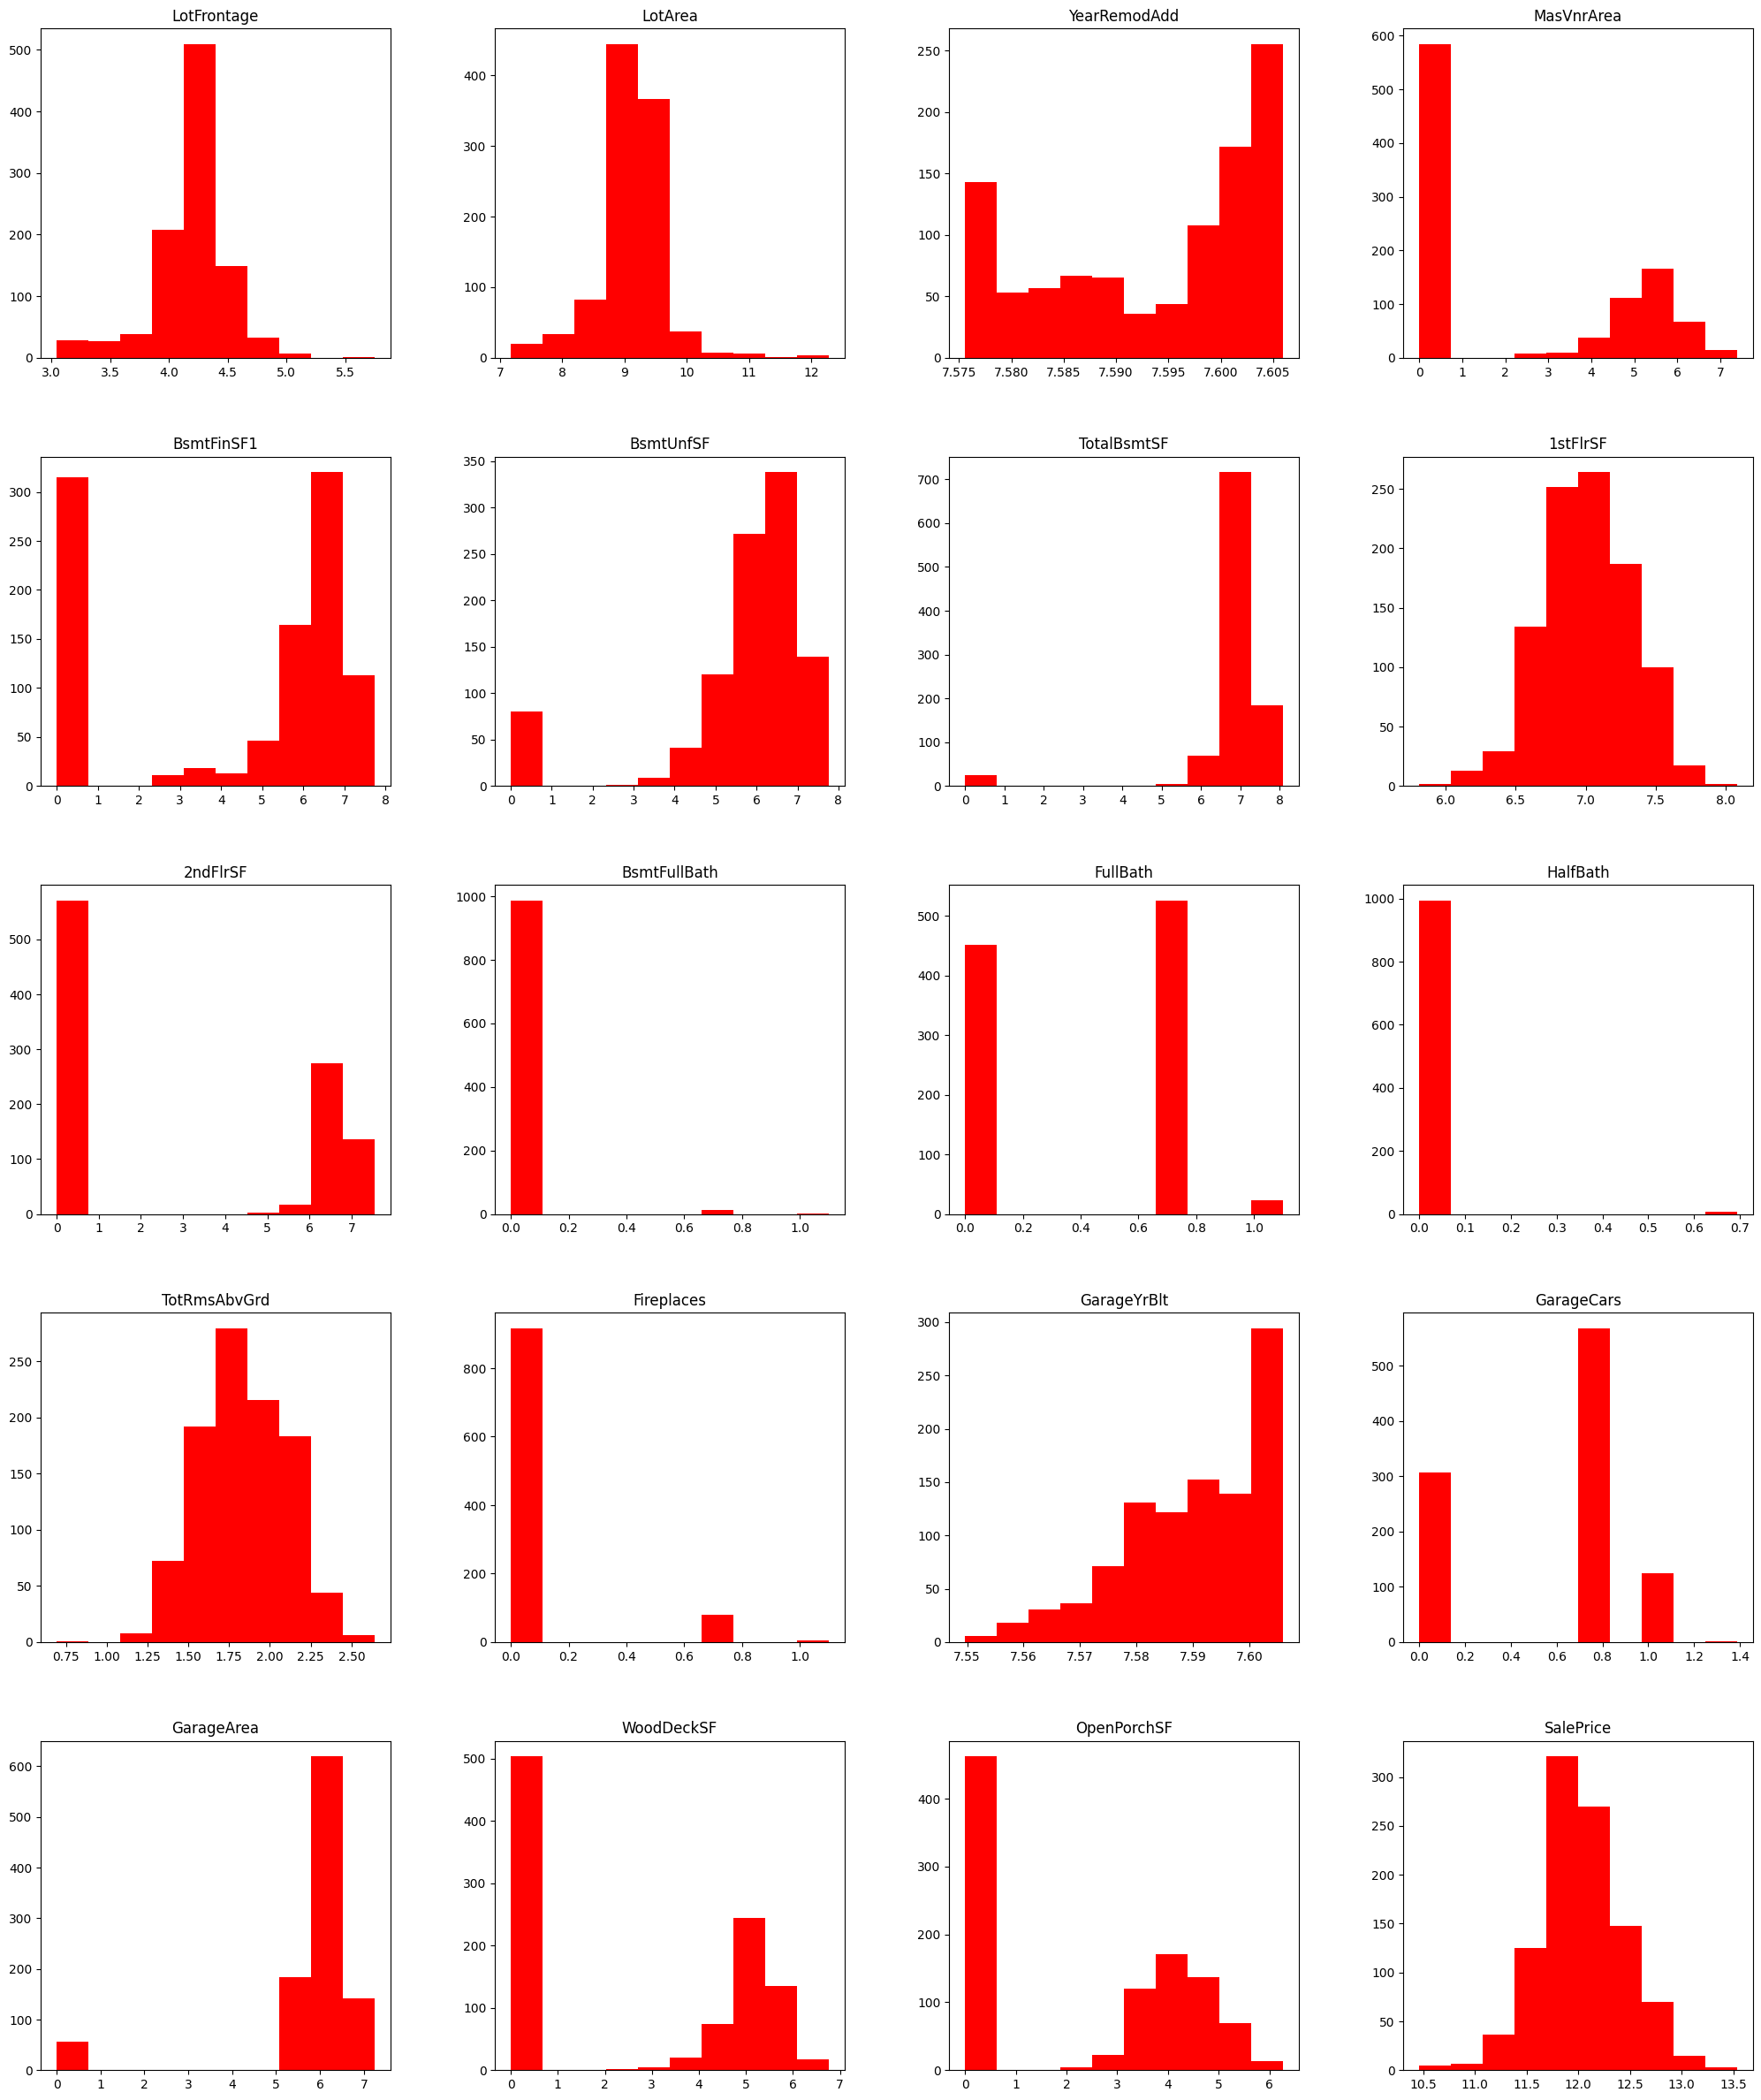

In [32]:
#Now that everything looks clean, let's check with some visualizations that there is no problem
(df_train_scaled.select_dtypes(include=[np.number])).hist(figsize = (25,30), grid = False, color ='Red')
plt.show()

In [33]:
print("train types :",df_train_scaled.dtypes.unique())
print("test types :",df_test_scaled.dtypes.unique())

train types : [dtype('float64') dtype('O')]
test types : [dtype('float64') dtype('O')]


In [34]:
#Resetting the index so ID become a column
df_test_scaled=df_test_scaled.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
#saving ID as in another dataframe so we can use it later
id_save=df_test_scaled['id']

In [35]:
#creating the X and Y train
X_train = df_train_scaled.drop(['SalePrice'], axis = 1)
Y_train = np.array(df_train_scaled['SalePrice']).reshape((-1,1))

In [36]:
#creating X_test by deleting ID feature so it has the same number of features as X_train
X_test = df_test_scaled.drop(['id'], axis = 1)

In [37]:
print("X train shape :",X_train.shape)
print("Y test shape :",Y_train.shape)
print("X test shape :",X_test.shape)


X train shape : (1000, 45)
Y test shape : (1000, 1)
X test shape : (460, 45)


In [38]:
#In order to train the data, we need to solve the problem of having text and numerical values
#reference 1 : https://towardsdatascience.com/how-to-combine-textual-and-numerical-features-for-machine-learning-in-python-dc1526ca94d9
#reference 2 : https://towardsdatascience.com/combining-numerical-and-text-features-in-deep-neural-networks-e91f0237eea4
#reference 3 : https://lms.univ-cotedazur.fr/2022/pluginfile.php/417882/mod_resource/content/2/09-ML%20pipeline.pdf
#reference 4 : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [39]:
#The best solution I found in order to replace the text features is the pandas function get_dummies : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [40]:
print("X train shape :",X_train.shape)
print("Y test shape :",Y_train.shape)
print("X test shape :",X_test.shape)

X train shape : (1000, 183)
Y test shape : (1000, 1)
X test shape : (460, 188)


In [41]:
#Here we can see that I have some features in test that I dont have in train, i will now eliminate them :
#(it must be because in the test dataset, there were some value that were not in the train one)
test_to_eliminate=[]
train_to_eliminate=[]
for featureTest in X_test.columns:
    if featureTest not in X_train.columns:
        test_to_eliminate.append(featureTest)
        
for featureTrain in X_train.columns:
    if featureTrain not in X_test.columns:
        train_to_eliminate.append(featureTrain)
        
print("Features deleted :",test_to_eliminate,train_to_eliminate)

X_test.drop(test_to_eliminate,axis=1,inplace=True)
X_train.drop(train_to_eliminate,axis=1,inplace=True)


Features deleted : ['RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_CBlock'] ['BsmtCond_Po']


In [42]:
print("X train shape :",X_train.shape)
print("Y train shape :",Y_train.shape)
print("X test shape :",X_test.shape)

X train shape : (1000, 182)
Y train shape : (1000, 1)
X test shape : (460, 182)


In [43]:
#Just a try to change the number of rows of X_train in order to test some functions because I had a problem if X_train and X_test did not have the same number of rows
originalLen=X_test.shape[0]
print("Former shape :",X_test.shape)
#print(X_test)
X_test_V2=pd.concat([X_test,X_test],axis=0)
X_test_V2=pd.concat([X_test_V2,X_test[0:(X_train.shape[0]-X_test_V2.shape[0])]],axis=0)

print("New shape :",X_test_V2.shape)

Former shape : (460, 182)
New shape : (1000, 182)


In [44]:
#I will now compare some models seen in Class according to the metrics RMSE as asked.

In [45]:
#Support vector machine (regressor) RMSE
svr = SVR(C=1000, gamma = 1)
svr.fit(X_train, Y_train.ravel())
y_pred = svr.predict(X_test_V2)
svrRMSE = mean_squared_error(Y_train, y_pred,squared = False)
svrRMSE

0.4048963225316564

In [46]:
#Decision trees RMSE 
#As we have continuous label, we will use Regressors instead of classifiers

#DecisionTreeClassifier()
DecTree = DecisionTreeRegressor(max_depth=1000)
DecTree.fit(X_train, Y_train.ravel())
y_pred = DecTree.predict(X_test_V2)
DecTreeRMSE = mean_squared_error(Y_train, y_pred,squared = False)
DecTreeRMSE

0.5734170157206767

In [47]:
#Random forest RMSE
random_forest = RandomForestRegressor(random_state=60)
random_forest.fit(X_train, Y_train.ravel())
y_pred = random_forest.predict(X_test_V2)
randomforest_RMSE = mean_squared_error(Y_train, y_pred,squared = False)
randomforest_RMSE 

0.5251003594256275

In [48]:
#K neihgbors regressor RMSE
KN_R = KNeighborsRegressor(1000)
KN_R.fit(X_train, Y_train.ravel())
y_pred = KN_R.predict(X_test_V2)
KN_R_RMSE = mean_squared_error(Y_train, y_pred,squared = False)
KN_R_RMSE 

0.40574888505995255

In [49]:
#Logistic regression RMSE
#essayer de faire
logreg=LogisticRegression()
logreg.fit(X_train, Y_train.ravel().astype(int)) #astype(int) to avoid the continuous error
y_pred = logreg.predict(X_test_V2)
logregRMSE = mean_squared_error(Y_train, y_pred,squared = False)
logregRMSE

C:\Users\paul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8478591023993883

In [50]:
#Linear regression RMSE
linReg=LinearRegression()
linReg.fit(X_train, Y_train.ravel())
y_pred = linReg.predict(X_test_V2)
linRegRMSE = mean_squared_error(Y_train, y_pred,squared = False)
linRegRMSE

1685038611.9655726

In [51]:
#Here we can see that the linear regression cant be used due to its RMSE

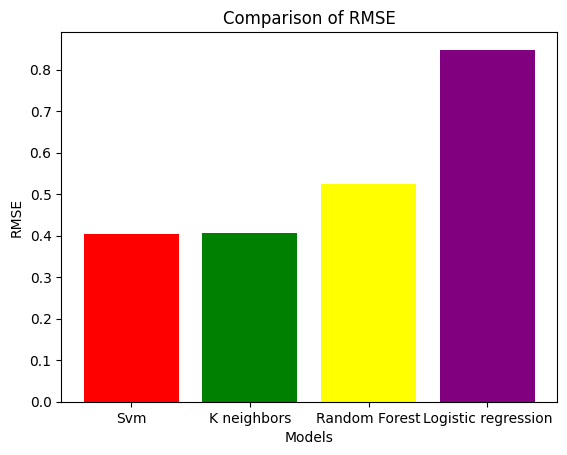

In [52]:

models = ["Svm","K neighbors","Random Forest","Logistic regression"]
                                 
RMSE= sorted([svrRMSE, randomforest_RMSE,KN_R_RMSE,logregRMSE])

left=[1,2,3,4]
plt.bar(left, RMSE, tick_label = models,width = 0.8, color = ['red', 'green',"yellow","purple"])
plt.xlabel('Models')
plt.ylabel('RMSE')

plt.title('Comparison of RMSE')
plt.show()

In [53]:
#Here, we can see that the SVM has the smallest RMSE value, thus we will continue with SVM

In [54]:
#So we can start predict the price using a SVM pipeline (svr)

In [55]:
# svr = SVR(C=1000, gamma = 1e-8) #I created another svr prediction with gamma = 1e-8 because otherwise the value was the same for every house
# svr.fit(X_train, Y_train.ravel())
# y_pred = svr.predict(X_test_V2) #Price prediction with log


In [56]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('svr', SVR(C=1000000, gamma = 1e-8))],verbose=True)  #I created another svr prediction with gamma = 1e-8 because otherwise the value was the same for every house
#I can see that the more I increase the C parameter, the better the predicted dataset is
pipe.fit(X_train, Y_train.ravel())
y_pred = pipe.predict(X_test_V2) #Price prediction with log

[Pipeline] ............... (step 1 of 1) Processing svr, total=   0.1s


In [57]:
price_prediction=np.exp(y_pred)
price_prediction=price_prediction[0:originalLen] #get only the price prediction of one occurences of each house as we modified the test set previously
len(price_prediction)

460

In [58]:
#Creating the dataframe
prediction_dataset=DataFrame()
prediction_dataset['id']=df_test.index
prediction_dataset['SalePrice']=price_prediction
prediction_dataset.head(3)

id      SalePrice
0  1000   68163.382215
1  1001  116370.152514
2  1002  239438.536680

In [59]:
prediction_dataset['SalePrice'].describe()

count       460.000000
mean     177346.227795
std       71657.544007
min       66207.777777
25%      124449.495987
50%      161673.833363
75%      217423.591209
max      642376.841730
Name: SalePrice, dtype: float64

In [60]:
df_train['SalePrice'].describe()

count      1000.000000
mean     182284.451000
std       80291.215207
min       34900.000000
25%      130000.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [61]:
#Exporting the dataframe in a new csv file
prediction_dataset.to_csv('result.csv', index = False)